In [1]:
# Import modules
%matplotlib inline
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
from six import StringIO
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier 
from urllib.request import urlopen 

plt.style.use('ggplot')
pd.set_option('display.max_columns', 500) 

In [2]:
# reading the data
data = pd.read_csv('HR_Employee_Attrition_Data.csv')

In [3]:
# display top 10 rows of table
data.head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,3,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,4,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,5,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,6,4,Male,79,3,1,Laboratory Technician,4,Single,3068,11864,0,Y,No,13,3,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,7,3,Female,81,4,1,Laboratory Technician,1,Married,2670,9964,4,Y,Yes,20,4,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,8,4,Male,67,3,1,Laboratory Technician,3,Divorced,2693,13335,1,Y,No,22,4,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,9,4,Male,44,2,3,Manufacturing Director,3,Single,9526,8787,0,Y,No,21,4,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,10,3,Male,94,3,2,Healthcare Representative,3,Married,5237,16577,6,Y,No,13,3,2,80,2,17,3,2,7,7,7,7


In [4]:
# size of table
data.shape

(2940, 35)

In [5]:
data.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              2940
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

In [6]:
# reomoved irrelevant columns as they have no unique values
data.drop('EmployeeCount', axis = 1, inplace = True)
data.drop('StandardHours', axis = 1, inplace = True)
data.drop('EmployeeNumber', axis = 1, inplace = True)
data.drop('Over18', axis = 1, inplace = True)
print(data.shape)

(2940, 31)


In [7]:
# check for any null values
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [8]:
# check dtypes
data.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYear        int64
WorkLifeBalance              int64
YearsAtCompany               int64
YearsInCurrentRole  

No     2466
Yes     474
Name: Attrition, dtype: int64

Attrition perentage is:  16.122448979591837


<AxesSubplot:xlabel='Attrition', ylabel='count'>

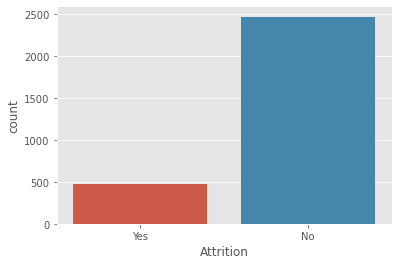

In [9]:
# count number of employees that stayed(No) and left(Yes) the company
print(data['Attrition'].value_counts())

# attrition percentage
print('\nAttrition perentage is: ' ,474/(2466+474)*100 )


#Visualize this count 
sns.countplot(x = 'Attrition',data =data)

<AxesSubplot:xlabel='Attrition', ylabel='MonthlyIncome'>

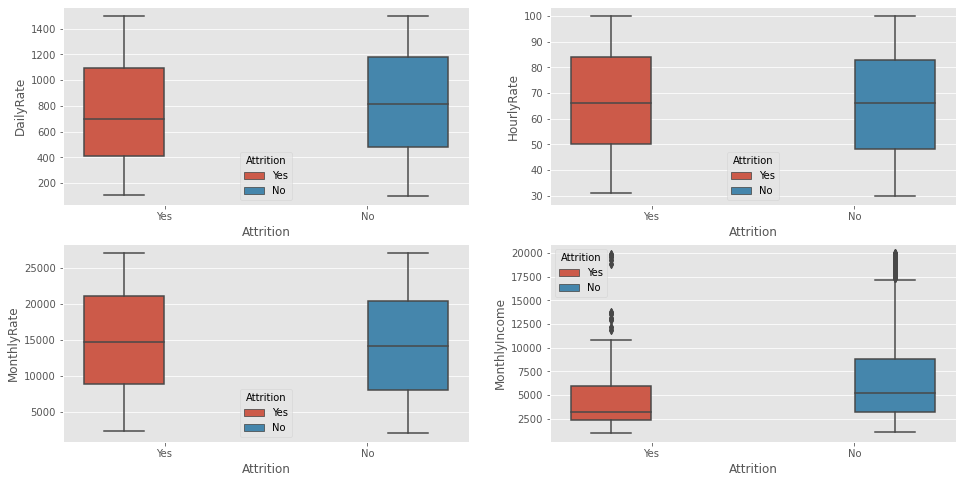

In [10]:
fig ,ax = plt.subplots(2,2,figsize = (16,8))
sns.boxplot(x= 'Attrition',y = 'DailyRate',data = data,ax = ax[0,0],hue = 'Attrition')
sns.boxplot(x= 'Attrition',y = 'HourlyRate',data = data,ax = ax[0,1],hue = 'Attrition')
sns.boxplot(x= 'Attrition',y = 'MonthlyRate',data = data,ax = ax[1,0],hue = 'Attrition')
sns.boxplot(x= 'Attrition',y = 'MonthlyIncome',data = data,ax = ax[1,1],hue = 'Attrition')
# employees have lower monthly and daily rate

<AxesSubplot:xlabel='JobSatisfaction', ylabel='count'>

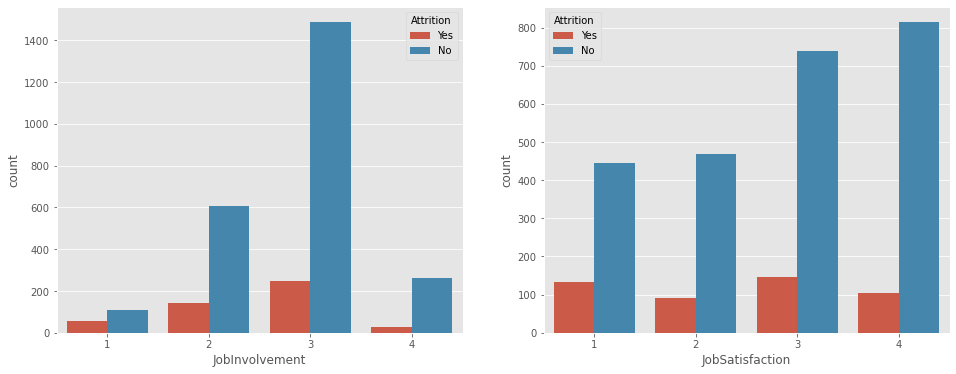

In [11]:
# check with job involvement and job satisfaction
fig,ax = plt.subplots(1,2,figsize = (16,6))
sns.countplot(x = 'JobInvolvement',data = data ,ax = ax[0],hue = 'Attrition')
sns.countplot(x = 'JobSatisfaction',data = data ,ax = ax[1],hue = 'Attrition')

# employees with high job involvement have higher attrittion count followed by medium ones 

<AxesSubplot:xlabel='WorkLifeBalance', ylabel='DistanceFromHome'>

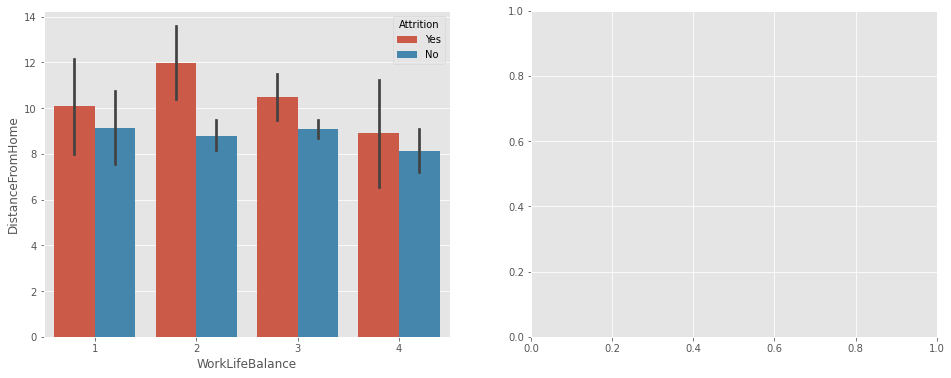

In [12]:
# check with distance from home and business travel
fig,ax = plt.subplots(1,2,figsize = (16,6))
sns.barplot(x = 'WorkLifeBalance' , y = 'DistanceFromHome',data = data ,ax = ax[0],hue = 'Attrition')

# employees with attrition choose to stay nearby and have better work life balance

<AxesSubplot:xlabel='YearsAtCompany', ylabel='Attrition'>

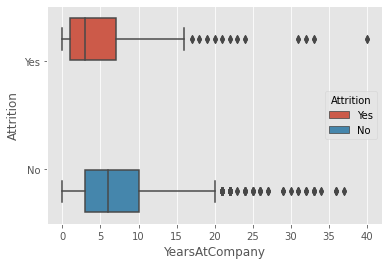

In [13]:
sns.boxplot(x= 'YearsAtCompany',y = 'Attrition',data = data,hue = 'Attrition')
# employees less than 8 yrs of experience move prefer to move to other company

No     2466
Yes     474
Name: Attrition, dtype: int64

Attrition perentage is:  16.122448979591837


<AxesSubplot:xlabel='Attrition', ylabel='count'>

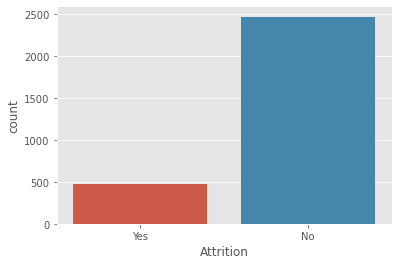

In [14]:
# count by Business travel
print(data['Attrition'].value_counts())

# attrition percentage
print('\nAttrition perentage is: ' ,474/(2466+474)*100 )


#Visualize this count 
sns.countplot(x = 'Attrition',data =data)

In [15]:
# convert data into ordinal variable [Sales-1,RnD-2,HR -3]

data.loc[data['Department'] == 'Sales','ord_Department']=1
data.loc[data['Department'] == 'Research & Development','ord_Department']=2
data.loc[data['Department'] == 'Human Resources','ord_Department']=3


In [16]:
# attrition by dept
dept_grp = data.groupby(by = 'Department') 
attrbysales = dept_grp.get_group('Sales')['Attrition'].value_counts()
attrbyRnD = dept_grp.get_group('Research & Development')['Attrition'].value_counts()
attrbyHR = dept_grp.get_group('Human Resources')['Attrition'].value_counts()


attrbydept = pd.DataFrame(columns = ['Department','Attrition'])
attrbydept.loc[len(attrbydept)] = ['Sales',(attrbysales['Yes']/attrbysales.sum()*100)]
attrbydept.loc[len(attrbydept)] = ['HR',(attrbyHR['Yes']/attrbyHR.sum()*100)]
attrbydept.loc[len(attrbydept)] = ['RnD',(attrbyRnD['Yes']/attrbyRnD.sum()*100)]
attrbydept

# highest attriton in sales team and second highest in Sales


,Department,Attrition
0,Sales,20.627803
1,HR,19.047619
2,RnD,13.839750


<AxesSubplot:xlabel='Department', ylabel='Attrition'>

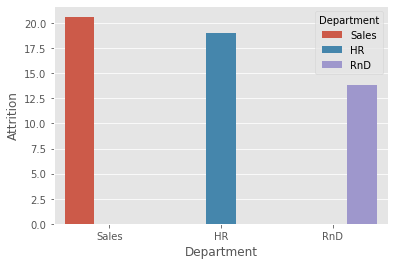

In [17]:
# visualize attrition by dept
sns.barplot(x = 'Department', y ='Attrition', data = attrbydept, hue = 'Department')

In [18]:
del data['ord_Department']

<AxesSubplot:xlabel='MaritalStatus', ylabel='count'>

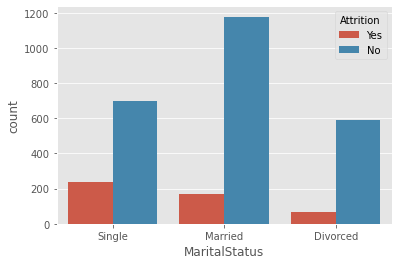

In [19]:
sns.countplot(x = 'MaritalStatus',data =data,hue ='Attrition')
# single employees have more attriton count followed by married employees.

In [20]:
#statistical characteristics 
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000
mean,36.923810,802.485714,9.192517,2.912925,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.133819,403.440447,8.105485,1.023991,1.092896,20.325969,0.711440,1.106752,1.102658,4707.155770,7116.575021,2.497584,3.659315,0.360762,1.081025,0.851932,7.779458,1.289051,0.706356,6.125483,3.622521,3.221882,3.567529
min,18.000000,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8045.000000,1.000000,12.000000,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,4.000000,84.000000,3.000000,3.000000,4.000000,8380.000000,20462.000000,4.000000,18.000000,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


<AxesSubplot:xlabel='Age', ylabel='count'>

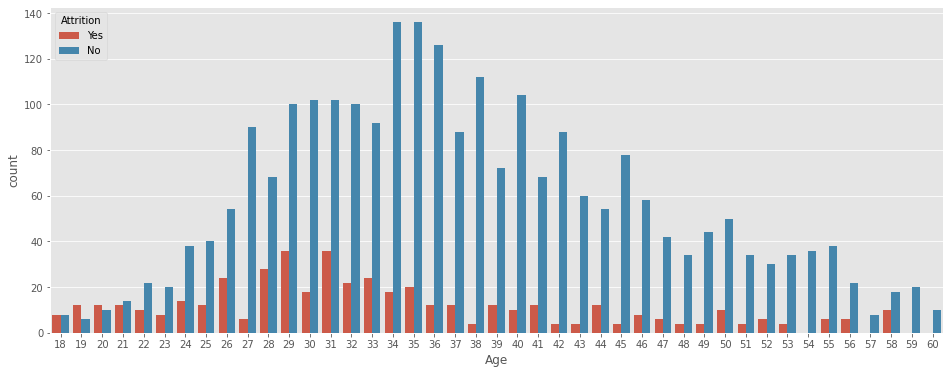

In [21]:
#number of employees that left or stayed by age
plt.subplots(figsize = (16,6))
sns.countplot(x = 'Age', hue = 'Attrition', data = data)
# age group 34-36 are currently employed and age group 29-31 left the company

In [22]:
data.corr()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,0.010146,0.024287,0.029820,0.509604,-0.004892,0.497855,0.028051,0.299635,0.003634,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,0.018355,0.023381,0.046135,0.002966,0.030571,0.007707,-0.032182,0.038153,0.022704,0.000473,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,-0.016075,0.031131,0.008783,0.005303,-0.003669,-0.017014,0.027473,-0.029251,0.040235,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,-0.027128,0.016775,0.042438,0.101589,-0.011296,0.094961,-0.026084,0.126317,-0.011111,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,1.000000,-0.049857,-0.008278,0.001212,-0.006784,-0.006259,0.037600,0.012594,-0.031701,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,0.016775,-0.049857,1.000000,0.042861,-0.027853,-0.071335,-0.015794,-0.015297,0.022157,-0.009062,-0.002172,0.001330,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,0.042438,-0.008278,0.042861,1.000000,-0.012630,-0.021476,-0.015271,-0.016322,0.015012,-0.017205,-0.029071,0.034297,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,0.101589,0.001212,-0.027853,-0.012630,1.000000,-0.001944,0.950300,0.039563,0.142501,-0.034730,-0.021222,0.021642,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281
JobSatisfaction,-0.004892,0.030571,-0.003669,-0.011296,-0.006784,-0.071335,-0.021476,-0.001944,1.000000,-0.007157,0.000644,-0.055699,0.020002,0.002297,-0.012454,0.010690,-0.020185,-0.005779,-0.019459,-0.003803,-0.002305,-0.018214,-0.027656
MonthlyIncome,0.497855,0.007707,-0.017014,0.094961,-0.006259,-0.015794,-0.015271,0.950300,-0.007157,1.000000,0.034814,0.149515,-0.027269,-0.017120,0.025873,0.005408,0.772893,-0.021736,0.030683,0.514285,0.363818,0.344978,0.344079


<AxesSubplot:>

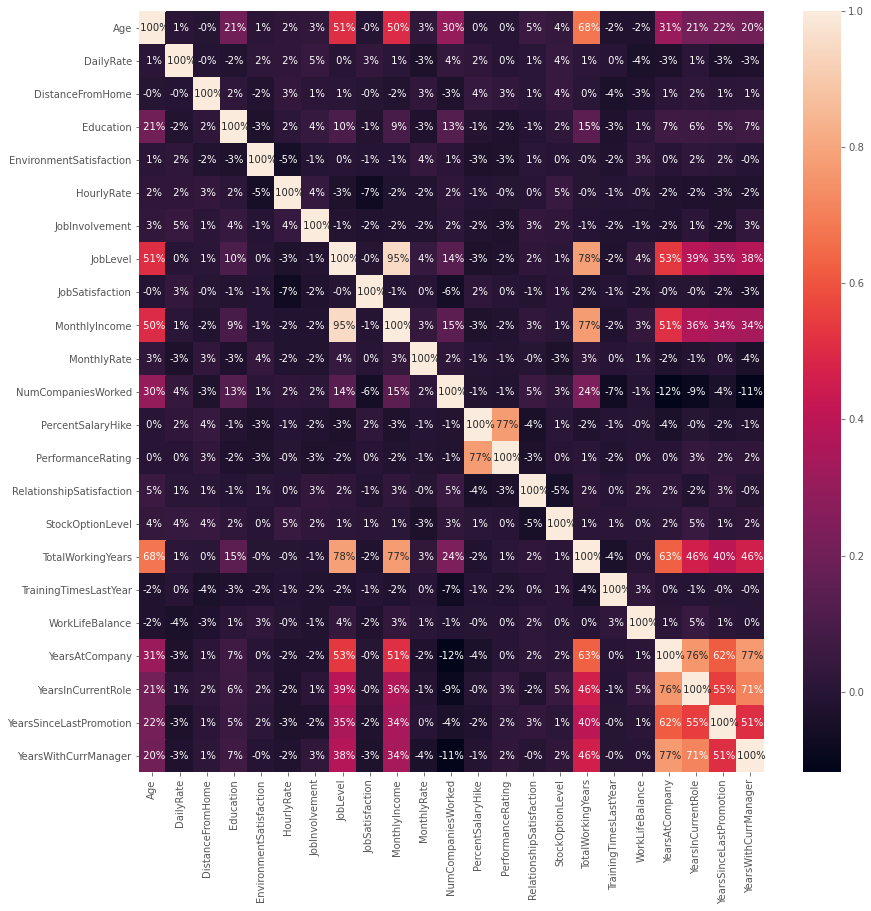

In [23]:
#correlation atrix
plt.figure(figsize = (14,14))
sns.heatmap(data.corr(),annot = True,cbar = True,fmt = ' .0%')

# insights:correlation between variables is clearly observed from the result.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='JobRole', ylabel='MonthlyIncome'>

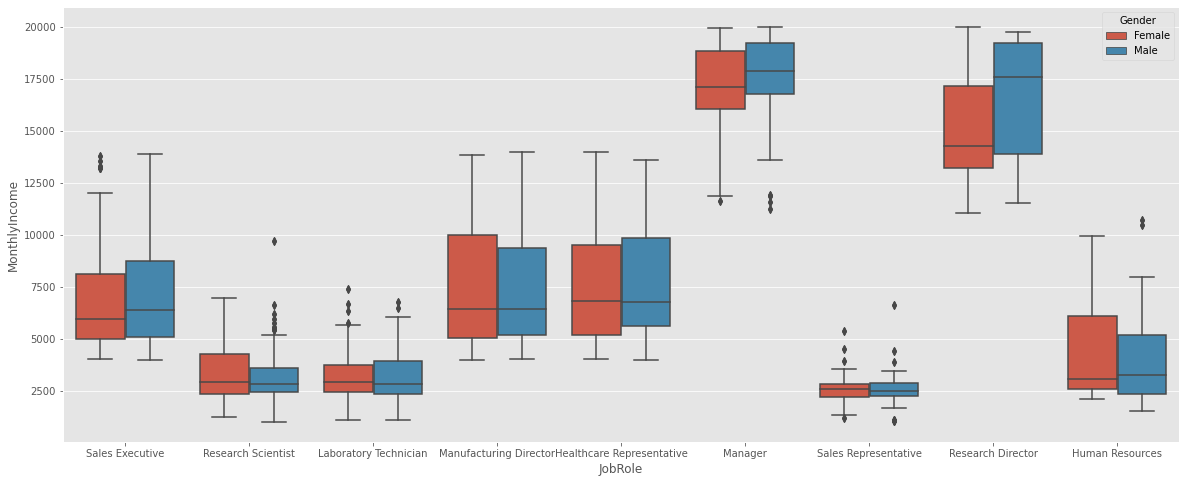

In [24]:
plt.figure(figsize=(20,8))
sns.boxplot('JobRole', 'MonthlyIncome', hue = 'Gender',data = data)


# insight : difference in the salary of males and females under the job role of Manager and Research Director,
# median salary of Sales Representatives, Laboratory Technicians,Research Scientist and Human Reources Employees 
# tends to be on the lower side

In [25]:
# attririon column shifted to first 
data['Age_Yrs'] = data['Age']
data = data.drop('Age',axis=1)

In [26]:
data.head()

,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Age_Yrs
0,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5,41
1,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7,49
2,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0,37
3,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0,33
4,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2,27


In [27]:
con_df = data

In [28]:
con_df.dtypes

Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYear        int64
WorkLifeBalance              int64
YearsAtCompany               int64
YearsInCurrentRole           int64
YearsSinceLastPromot

In [29]:
def preprocessor(df):
    res_df = df.copy()
    le = preprocessing.LabelEncoder()
    
    res_df['BusinessTravel'] = le.fit_transform(res_df['BusinessTravel'])
    res_df['Department'] = le.fit_transform(res_df['Department'])
    res_df['EducationField'] = le.fit_transform(res_df['EducationField'])
    res_df['Gender'] = le.fit_transform(res_df['Gender'])
    res_df['JobRole'] = le.fit_transform(res_df['JobRole'])
    res_df['MaritalStatus'] = le.fit_transform(res_df['MaritalStatus'])
    res_df['OverTime'] = le.fit_transform(res_df['OverTime'])
    res_df['Attrition'] = le.fit_transform(res_df['Attrition'])
    return res_df

In [30]:
encoded_df = preprocessor(con_df)

x = encoded_df.iloc[:,encoded_df.columns != 'Attrition']
y = encoded_df.iloc[:,encoded_df.columns == 'Attrition']

In [31]:
# splitting of data
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size =0.2)

In [32]:
encoded_df.head()

,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Age_Yrs
0,1,2,1102,2,1,2,1,2,0,94,3,2,7,4,2,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5,41
1,0,1,279,1,8,1,1,3,1,61,2,2,6,2,1,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7,49
2,1,2,1373,1,2,2,4,4,1,92,2,1,2,3,2,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0,37
3,0,1,1392,1,3,4,1,4,0,56,3,1,6,3,1,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0,33
4,0,2,591,1,2,1,3,1,1,40,3,1,2,2,1,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2,27


# Decision Tree Algo implementation

In [33]:
# Decision tree with depth = Auto
model_dt = DecisionTreeClassifier(random_state=1, max_depth= None ,min_samples_split = 100 ,min_samples_leaf = 50)
model_dt.fit(x_train, y_train)
model_dt_score_train = model_dt.score(x_train, y_train)
print("Training score: ",model_dt_score_train)
model_dt_score_test = model_dt.score(x_test, y_test)
print("Testing score: ",model_dt_score_test)
y_pred_dt = model_dt.predict_proba(x_test)[:, 1]

Training score:  0.8720238095238095
Testing score:  0.8418367346938775


# Performance Metrics

In [34]:
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)

In [35]:
predictions = model_dt.predict(x_test)
# predictions

In [36]:
y_actual_result = 0
for i in range(len(predictions)):
    if(predictions[i] == 1):
        y_actual_result = np.vstack((y_actual_result, y_test.iloc[i]))

# Recall

In [37]:
#Recall
y_actual_result = y_actual_result.flatten()
count = 0
for result in y_actual_result:
     if(result == 1):
        count=count+1

print ("true yes|predicted yes:")
print (count/float(len(y_actual_result)))

true yes|predicted yes:
0.574468085106383


# Area under the curve

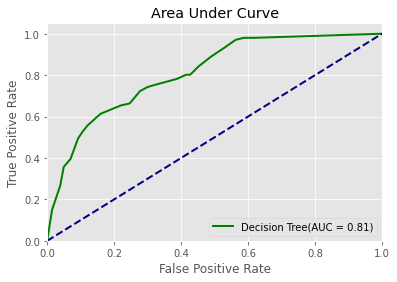

In [38]:
plt.figure(1)
lw = 2
plt.plot(fpr_dt, tpr_dt, color='green',
         lw=lw, label='Decision Tree(AUC = %0.2f)' % roc_auc_dt)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Area Under Curve')
plt.legend(loc="lower right")
plt.show()

In [39]:
print (confusion_matrix(y_test, predictions))

[[468  19]
 [ 74  27]]


In [40]:
accuracy_score(y_test, predictions)

0.8418367346938775

In [41]:
import itertools
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(model, normalize=False): # This function prints and plots the confusion matrix.
    cm = confusion_matrix(y_test, model, labels=[0, 1])
    classes=["Success", "Default"]
    cmap = plt.cm.Blues
    title = "Confusion Matrix"
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=3)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

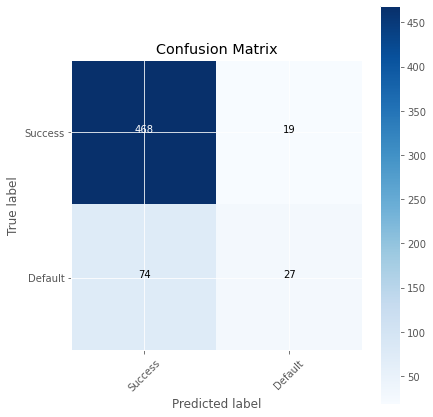

In [42]:
plt.figure(figsize=(6,6))
plot_confusion_matrix(predictions, normalize=False)
plt.show()

In [43]:
# Set the random state for reproducibility
fit_dt = DecisionTreeClassifier(random_state=42)

## Finding optimal hyperparameters for Decesion Tree

In [44]:
# GridSearchCv to get optimal parameters

np.random.seed(42)
start = time.time()

param_dist = {'max_depth': [6,7,8,9,10,11,12,13],
              'min_samples_leaf': [10,15,20,40],
              'min_samples_split':[2,3,6,7,8] ,
              'criterion': ['gini', 'entropy']}

cv_rf = GridSearchCV(fit_dt, cv = 10,
                     param_grid=param_dist, 
                     n_jobs = 3)

cv_rf.fit(x_train, y_train)
print('Best Parameters using grid search: \n', cv_rf.best_params_)
end = time.time()
print('Time taken in grid search: {0: .2f}'.format(end - start))

Best Parameters using grid search: 
 {'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 10, 'min_samples_split': 2}
Time taken in grid search:  26.47


In [45]:
model_dt = DecisionTreeClassifier(random_state=1, max_depth= 7 ,min_samples_split = 2 ,min_samples_leaf = 10)
model_dt.fit(x_train, y_train)
model_dt_score_train = model_dt.score(x_train, y_train)
print("Training score: ",model_dt_score_train)
model_dt_score_test = model_dt.score(x_test, y_test)
print("Testing score: ",model_dt_score_test)
y_pred_dt = model_dt.predict_proba(x_test)[:, 1]

Training score:  0.9107142857142857
Testing score:  0.8673469387755102


# Performance Metrics

In [46]:
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)

In [47]:
predictions = model_dt.predict(x_test)
# predictions

In [48]:
y_actual_result = 0
for i in range(len(predictions)):
    if(predictions[i] == 1):
        y_actual_result = np.vstack((y_actual_result, y_test.iloc[i]))

In [49]:
#Recall
y_actual_result = y_actual_result.flatten()
count = 0
for result in y_actual_result:
     if(result == 1):
        count=count+1

print ("true yes|predicted yes:")
print (count/float(len(y_actual_result)))

true yes|predicted yes:
0.6527777777777778


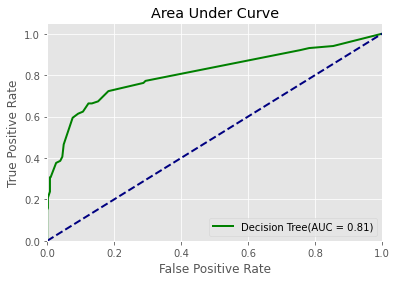

In [50]:
plt.figure(1)
lw = 2
plt.plot(fpr_dt, tpr_dt, color='green',
         lw=lw, label='Decision Tree(AUC = %0.2f)' % roc_auc_dt)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Area Under Curve')
plt.legend(loc="lower right")
plt.show()

In [51]:
print (confusion_matrix(y_test, predictions))

[[463  24]
 [ 54  47]]


In [52]:
accuracy_score(y_test, predictions)

0.8673469387755102

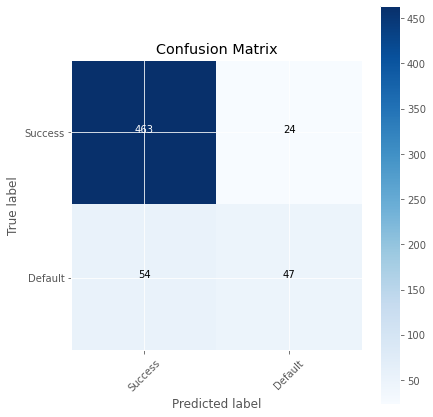

In [53]:
plt.figure(figsize=(6,6))
plot_confusion_matrix(predictions, normalize=False)
plt.show()